In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pwd

/content


In [3]:
from google.colab import files
files.upload()

Saving RSCCASN.csv to RSCCASN.csv


{'RSCCASN.csv': b'DATE,RSCCASN\r\n1992-01-01,6938\r\n1992-02-01,7524\r\n1992-03-01,8475\r\n1992-04-01,9401\r\n1992-05-01,9558\r\n1992-06-01,9182\r\n1992-07-01,9103\r\n1992-08-01,10513\r\n1992-09-01,9573\r\n1992-10-01,10254\r\n1992-11-01,11187\r\n1992-12-01,18395\r\n1993-01-01,7502\r\n1993-02-01,7524\r\n1993-03-01,8766\r\n1993-04-01,9867\r\n1993-05-01,10063\r\n1993-06-01,9635\r\n1993-07-01,9794\r\n1993-08-01,10628\r\n1993-09-01,10013\r\n1993-10-01,10346\r\n1993-11-01,11760\r\n1993-12-01,18851\r\n1994-01-01,7280\r\n1994-02-01,7902\r\n1994-03-01,9921\r\n1994-04-01,9869\r\n1994-05-01,10009\r\n1994-06-01,9893\r\n1994-07-01,9735\r\n1994-08-01,11157\r\n1994-09-01,10217\r\n1994-10-01,10730\r\n1994-11-01,12354\r\n1994-12-01,20016\r\n1995-01-01,7518\r\n1995-02-01,7961\r\n1995-03-01,9815\r\n1995-04-01,10168\r\n1995-05-01,10620\r\n1995-06-01,10301\r\n1995-07-01,9784\r\n1995-08-01,11264\r\n1995-09-01,10710\r\n1995-10-01,10439\r\n1995-11-01,12751\r\n1995-12-01,20002\r\n1996-01-01,7684\r\n1996-02-01,

In [7]:
df = pd.read_csv("/content/RSCCASN.csv",parse_dates=True,index_col="DATE")

In [8]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [9]:
df.columns = ["Sales"]

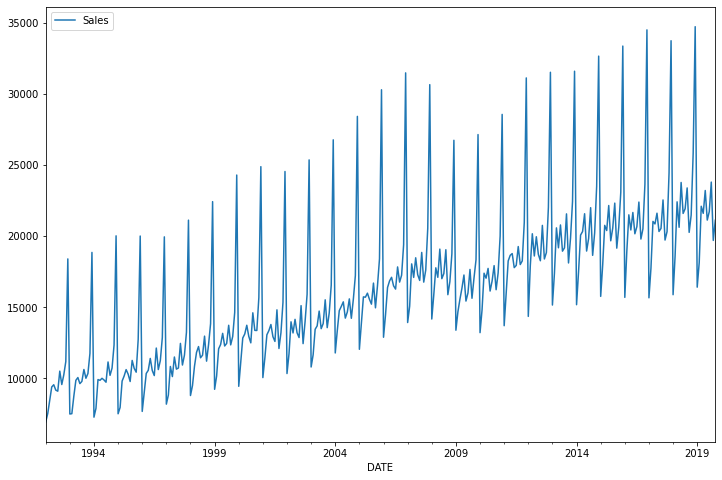

In [10]:
df.plot(figsize=(12,8))

In [12]:
len(df)

334

In [13]:
test_size = 18
test_ind = len(df)-test_size

In [17]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [20]:
sc.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
scaled_train = sc.transform(train)
scaled_test = sc.transform(test)

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
length = 12
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [29]:
n_features = 1
model = Sequential()
model.add(LSTM(units=100,activation="relu",input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [31]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=2)

In [32]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length,batch_size=1)

In [34]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 6s 21ms/step - loss: 0.0250 - val_loss: 0.0628
Epoch 2/20
304/304 [==============================] - 6s 21ms/step - loss: 0.0176 - val_loss: 0.0071
Epoch 3/20
304/304 [==============================] - 6s 21ms/step - loss: 0.0132 - val_loss: 0.0025
Epoch 4/20
304/304 [==============================] - 6s 20ms/step - loss: 0.0071 - val_loss: 0.0041
Epoch 5/20
304/304 [==============================] - 6s 20ms/step - loss: 0.0049 - val_loss: 9.4267e-04
Epoch 6/20
304/304 [==============================] - 6s 20ms/step - loss: 0.0023 - val_loss: 5.9290e-04
Epoch 7/20
304/304 [==============================] - 6s 21ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 8/20
304/304 [==============================] - 6s 20ms/step - loss: 0.0016 - val_loss: 0.0011


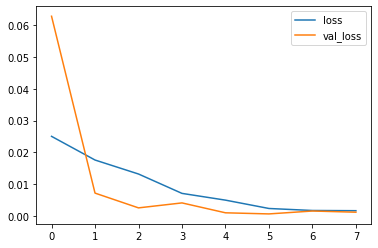

In [35]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [36]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch  = first_eval_batch.reshape(1,length,n_features)

for i in range(len(test)):
  curr_pred = model.predict(current_batch)[0]
  test_predictions.append(curr_pred)
  current_batch = np.append(current_batch[:,1:,:],[[curr_pred]],axis=1)

In [37]:
true_predictions = sc.inverse_transform(test_predictions)

In [38]:
test["Predictions"] = true_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1]:
test.plot()

NameError: ignored

In [40]:
full_sc = MinMaxScaler()
scaled_full_data = full_sc.fit_transform(df)

In [41]:
length = 12
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length,batch_size=1)

In [42]:
model = Sequential()
model.add(LSTM(units=100,activation="relu",input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [43]:
model.fit_generator(generator,epochs=7 )

Epoch 1/7
322/322 [==============================] - 6s 19ms/step - loss: 0.0244
Epoch 2/7
322/322 [==============================] - 6s 19ms/step - loss: 0.0171
Epoch 3/7
322/322 [==============================] - 6s 19ms/step - loss: 0.0082
Epoch 4/7
322/322 [==============================] - 6s 19ms/step - loss: 0.0055
Epoch 5/7
322/322 [==============================] - 6s 20ms/step - loss: 0.0054
Epoch 6/7
322/322 [==============================] - 6s 20ms/step - loss: 0.0015
Epoch 7/7
322/322 [==============================] - 6s 20ms/step - loss: 0.0015


In [44]:
forecast = []
periods = 12
first_eval_batch = scaled_full_data[-length:]
current_batch  = first_eval_batch.reshape(1,length,n_features)

for i in range(periods):
  curr_pred = model.predict(current_batch)[0]
  forecast.append(curr_pred)
  current_batch = np.append(current_batch[:,1:,:],[[curr_pred]],axis=1)

In [45]:
forecast = sc.inverse_transform(forecast)

In [46]:
forecast_index = pd.date_range(start="2019-11-01",periods = periods,freq="MS")

In [47]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [48]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,columns=["Forecast"])

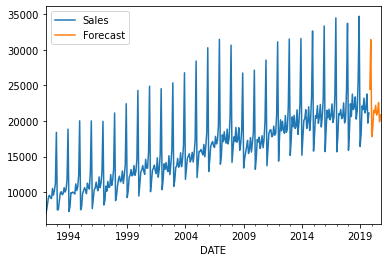

In [49]:
ax = df.plot()
forecast_df.plot(ax=ax)